# **Seaborn**

paketi verigörselleştirmelerinde matplot ile birlikte kullanılır


In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
modely = pd.read_excel("/content/model_y_sales_data_turkey.xlsx")

In [6]:
#klasik sitilde bir grafik oluşturacağız.
# Matplotlib grafiklerinin genel görsel stilini 'classic' olarak ayarlar.
# Bu stil, grafiklerin daha geleneksel bir görünüme sahip olmasını sağlar.
plt.style.use("classic")

In [7]:
#Grafikleri satır aralarında görmek için

%matplotlib inline

In [8]:
# x ve y değişkenlerimizi oluşturalım.

# Rastgele sayı üreteci başlatılır. Bu, her çalıştırmada aynı rastgele sayı dizisini elde etmek için kullanılır.
rng=np.random.RandomState()

# 0 ile 10 arasında eşit aralıklarla 250 adet sayıdan oluşan bir dizi (x ekseni için)
# (0, 0.04, 0.08, ..., 10 gibi)
x=np.linspace(0,10,250)

# Ortalama 0 ve standart sapması 1 olan normal dağılımdan 250 satır ve 6 sütundan oluşan rastgele sayıların,
# sütun bazında kümülatif toplamını (y ekseni için) içeren bir dizi.
y=np.cumsum(rng.randn(250,6), axis=0)


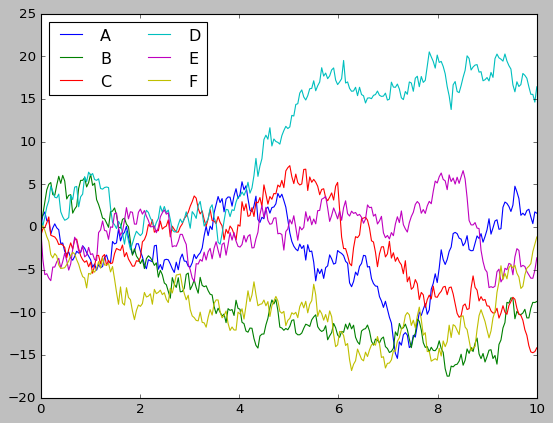

In [9]:
#Çizmeye başlayalım.

# x eksenindeki değerlere karşılık y eksenindeki değerleri çizerek bir çizgi grafik oluşturur.
# y değişkeni 6 sütunlu olduğundan, bu komut 6 ayrı çizgi çizecektir.
plt.plot(x,y)

# Grafiğe bir açıklama (legend) ekler.
# "ABCDEF": Çizgilerin etiketleri (her bir sütun için bir etiket).
# ncol=2: Açıklamaları iki sütun halinde düzenler.
# loc="best": Açıklamanın grafikte veriyle çakışmayacak en iyi konuma otomatik olarak yerleştirilmesini sağlar.
plt.legend("ABCDEF", ncol=2, loc="best")


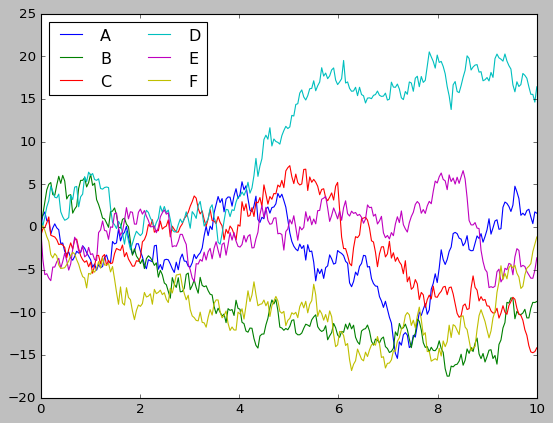

In [10]:
#Aynı işlemi seaborn ile yapmak istesek

sns.set
plt.plot(x,y)
plt.legend("ABCDEF", ncol=2, loc="best")

In [13]:
#iris veri setini çekelim
veri=sns.load_dataset("iris")

In [14]:
veri.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
veri.shape

(150, 5)

In [18]:
veri.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [21]:
#İki farkl kategoeiye ait verileri alalım.
setosa=veri[veri['species']=="setosa"]
versicolor=veri[veri['species']=="versicolor"]

In [22]:
setosa.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [23]:
versicolor.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


<Axes: ylabel='Frequency'>

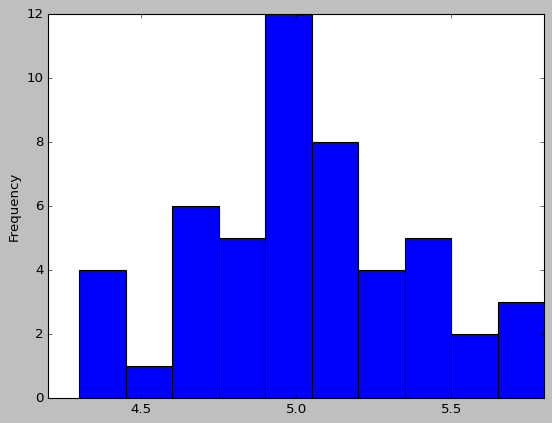

In [24]:
#setosa türünün sepal_lengt verisinin histogram grafiğini çizdirmek istiyorum

setosa.sepal_length.plot.hist()

/tmp/ipython-input-390513463.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(setosa.sepal_length, shade=True, color= "g")


<Axes: xlabel='sepal_length', ylabel='Density'>

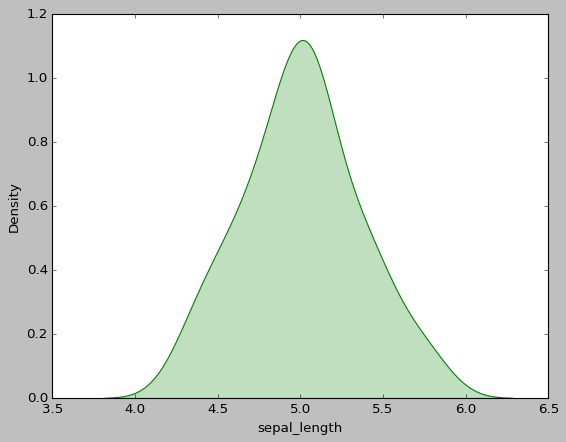

In [30]:
#Eğer yoğunluk grafiğini oluşturmak istersek sns.ked ile , shade ile gölge oluşturduk, color ile rengi belirledik

sns.kdeplot(setosa.sepal_length, shade=True, color= "g")



<Axes: xlabel='sepal_length', ylabel='Count'>

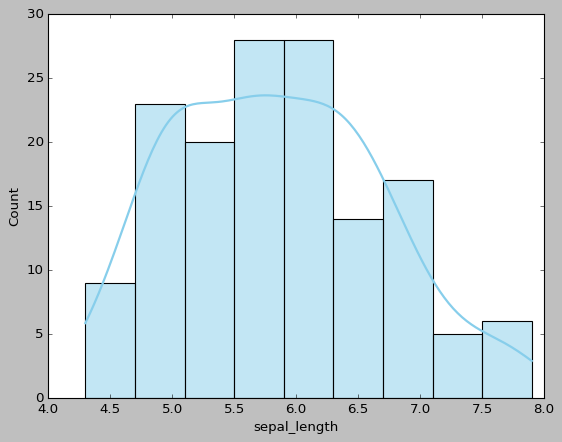

In [35]:
#Histogram ve yoğunluk grafiğini beraber görmek için

# sns.histplot: Seaborn kütüphanesinden bir histogram çizmek için kullanılan fonksiyon.
# veri.sepal_length: Histogramı çizilecek veri serisi (tüm 'veri' DataFrame'ine ait sepal_length değerleri).
# kde=True: Histogramın üzerine Çekirdek Yoğunluk Tahmini (Kernel Density Estimate - KDE) grafiğini de çizer. Bu, veri dağılımının yumuşatılmış bir temsilini sağlar.
# color='skyblue': Histogram çubuklarının iç rengini 'skyblue' olarak ayarlar.
# edgecolor='black': Histogram çubuklarının kenar çizgi rengini 'black' olarak ayarlar.
# line_kws={'lw': 2}: KDE çizgisinin stil ayarlarını belirler.
#   - 'lw': KDE çizgisinin kalınlığını 2 olarak ayarlar.
sns.histplot(veri.sepal_length, kde=True, color='skyblue', edgecolor='black', line_kws={'lw': 2})

<Axes: xlabel='sepal_length', ylabel='Count'>

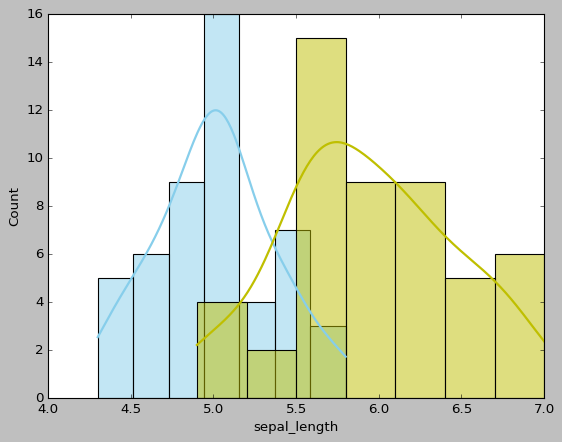

In [37]:
#aynı grafikte iki farklı grafiği kıyaslama istersem
sns.histplot(setosa.sepal_length, kde=True, color='skyblue', edgecolor='black', line_kws={'lw': 2})
sns.histplot(versicolor.sepal_length, kde=True, color='y', edgecolor='black', line_kws={'lw': 2})



<Axes: xlabel='sepal_length', ylabel='sepal_width'>

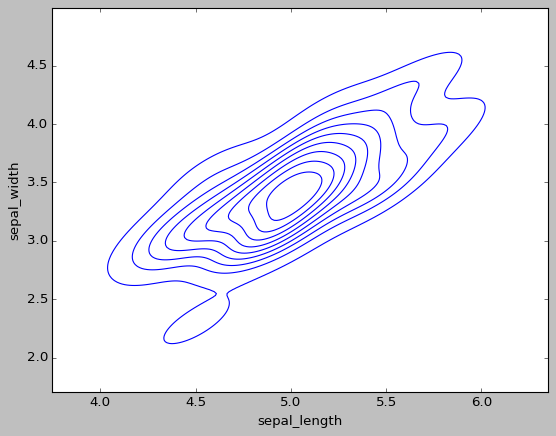

In [44]:
#iki veri setinin iki boyutlu grafiğini çizdirmek istersek

sns.kdeplot(x=setosa.sepal_length, y=setosa.sepal_width)

/tmp/ipython-input-49138438.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=setosa.sepal_length, y=setosa.sepal_width,shade=True)


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

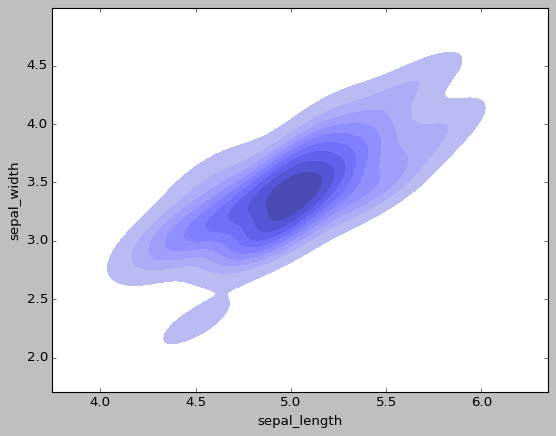

In [43]:
sns.kdeplot(x=setosa.sepal_length, y=setosa.sepal_width,shade=True)

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1832: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


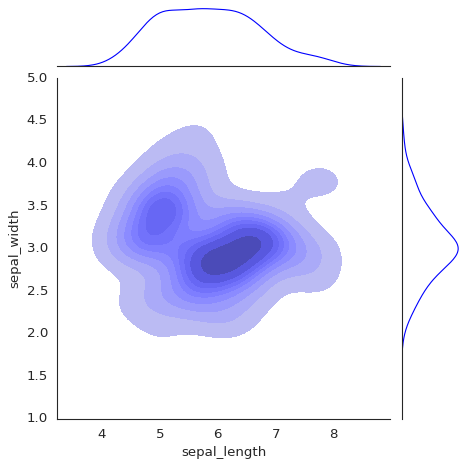

In [52]:
#iki boyutlu karşılaştırmalı grafik oluşturmak istersem

with sns.axes_style("white"):
  # sns.jointplot: İki değişken arasındaki ilişkiyi ve her bir değişkenin tekli dağılımını gösteren bir grafik oluşturur.
  # x="sepal_length": X ekseni için 'sepal_length' sütununu kullanır.
  # y="sepal_width": Y ekseni için 'sepal_width' sütununu kullanır.
  # data=veri: Grafik için kullanılacak DataFrame'i belirtir.
  # kind="kde": Ana grafiğin ve marjinal (kenar) grafiklerin Kernel Yoğunluk Tahmini (KDE) olarak çizileceğini belirtir.
  # with sns.axes_style("white"): Bu blok içindeki grafiklerin arka plan stilini beyaz yapar.
  sns.jointplot(x="sepal_length", y="sepal_width" ,data=veri, kind="kde",shade=True)

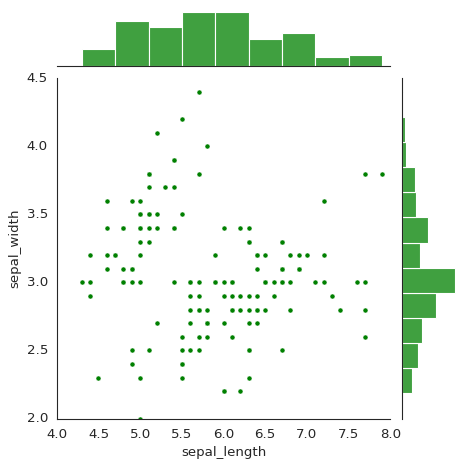

In [70]:
#Bu da aynı iki verinin karşılaştırmalı farklı grafiği
with sns.axes_style("white"):
  sns.jointplot(x="sepal_length", y="sepal_width" ,data=veri, color="g")
#

In [64]:
#Mesela bir fonksiyonunun metotlarını görmek istersek
sns.jointplot?

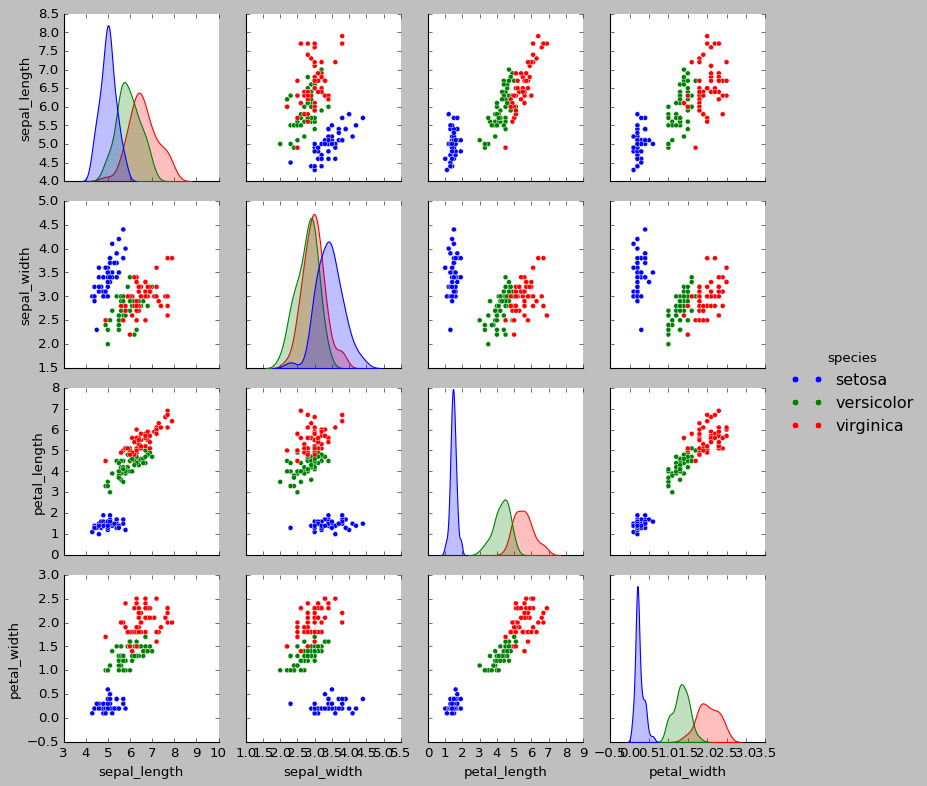

In [71]:
#Değişkenlerin ikili ilişkilerini görmek istersek

sns.pairplot(veri,hue="species")

In [72]:
tips=sns.load_dataset("tips")

In [73]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [77]:
#bahşiş yüzdesi ni hesaplayı sütün olrak verimize eklemek için

tips["tips_percent"]= (tips.tip*100/tips.total_bill)
tips.head()


,total_bill,tip,sex,smoker,day,time,size,tips_percent
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


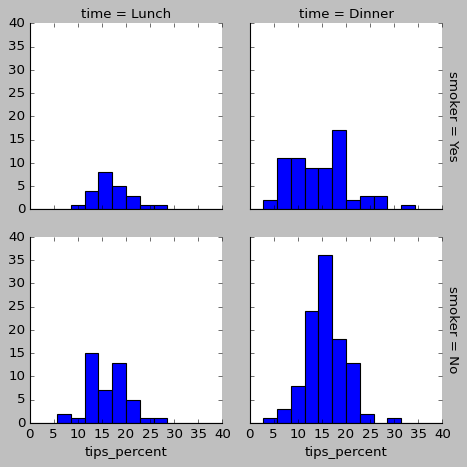

In [86]:
#kategorilerin histogramını görmek istersem

# sns.FacetGrid: Veri setindeki birden fazla kategorik değişkene göre grafikleri düzenlemek için bir ızgara oluşturur.
# tips: Kullanılacak DataFrame.
# col="time": 'time' sütunundaki (Dinner/Lunch) her benzersiz değer için ayrı bir sütun oluşturur.
# row="smoker": 'smoker' sütunundaki (Yes/No) her benzersiz değer için ayrı bir satır oluşturur.
# margin_titles=True: Satır ve sütun başlıklarının, her alt grafik grubunun kenarlarına yerleştirilmesini sağlar.
grid=sns.FacetGrid(tips, col="time", row="smoker",margin_titles=True)

# grid.map: Oluşturulan ızgaradaki her alt grafiğe belirli bir çizim fonksiyonunu (plt.hist) uygular.
# plt.hist: Belirtilen veri ('tips_percent') için bir histogram çizer.
# "tips_percent": Histogramı çizilecek olan sütun adı.
# bins=np.linspace(0,40,15): Histogram çubuklarının aralıklarını (binlerini) belirler.
#   - np.linspace(0,40,15): 0 ile 40 arasında eşit aralıklarla 15 adet değer oluşturur, bu değerler histogramın başlangıç ve bitiş noktalarını ve aralık sayılarını belirler.
grid.map(plt.hist, "tips_percent",bins=np.linspace(0,40,15))

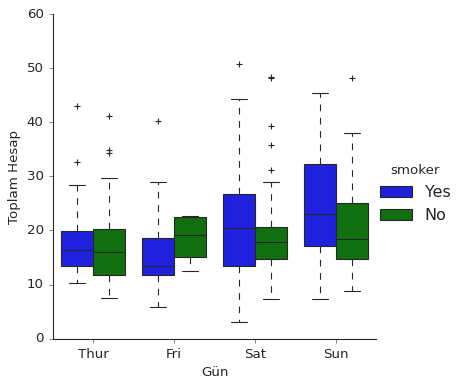

In [92]:
#Aykırı değerleri görmek istersek
with sns.axes_style(style="ticks"):
  # sns.catplot: Kategorik ve sayısal değişkenler arasındaki ilişkileri gösteren çeşitli kategorik grafikler oluşturmak için kullanılır.
  # x="day": X ekseninde 'day' sütununu kullanır (Pazar, Cumartesi, vb.).
  # y="total_bill": Y ekseninde 'total_bill' sütununu kullanır.
  # hue="smoker": 'smoker' sütunundaki (Yes/No) her benzersiz değer için farklı renkler kullanarak gruplandırma yapar.
  # data=tips: Grafik için kullanılacak DataFrame.
  # kind="box": Oluşturulacak grafik türünün kutu grafiği (boxplot) olacağını belirtir.
  g=sns.catplot(x="day", y="total_bill", hue="smoker", data=tips, kind="box")
  # g.set_axis_labels: Grafiğin x ve y ekseni etiketlerini ayarlar.
  g.set_axis_labels("Gün","Toplam Hesap")

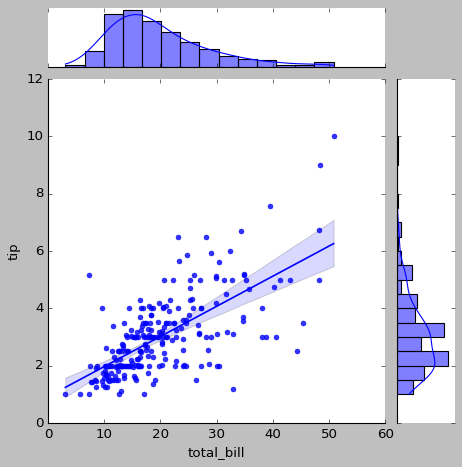

In [94]:
# sns.jointplot: İki değişken arasındaki ilişkiyi ve her bir değişkenin tekli dağılımını gösteren bir grafik oluşturur.
# x="total_bill": X ekseni için 'total_bill' sütununu kullanır.
# y="tip": Y ekseni için 'tip' sütununu kullanır.
# data=tips: Grafik için kullanılacak DataFrame'i belirtir.
# kind="reg": Ana grafiğin ve marjinal (kenar) grafiklerin regresyon çizgisini de içeren bir saçılım grafiği olacağını belirtir.
sns.jointplot(x="total_bill",y="tip",data=tips,kind="reg")

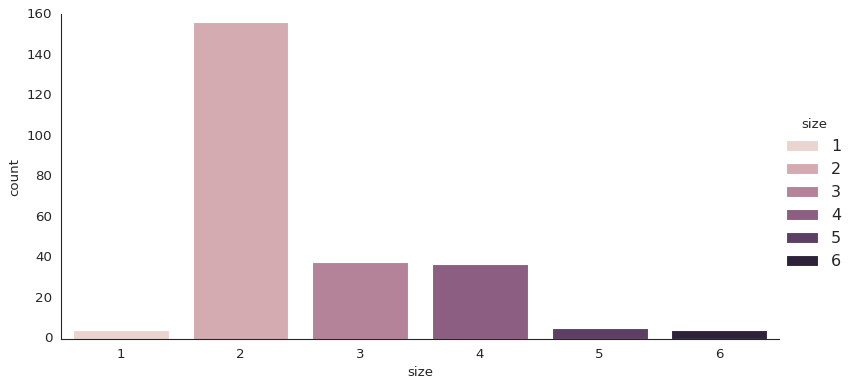

In [97]:
#Size değişkeni için histogram grafiğini kullanmak istersek
with sns.axes_style("white"):
  # sns.catplot: Kategorik ve sayısal değişkenler arasındaki ilişkileri gösteren çeşitli kategorik grafikler oluşturmak için kullanılır.
  # x="size": X ekseninde 'size' sütununu kullanır.
  # data=tips: Grafik için kullanılacak DataFrame'i belirtir.
  # kind="count": Belirtilen kategorik değişkenin her bir değeri için gözlem sayısını gösteren bir çubuk grafik oluşturur.
  # aspect=2: Grafiğin en boy oranını (genişlik/yükseklik) 2 olarak ayarlar. Bu, grafiği daha geniş yapar.
  # hue="size": Her bir 'size' kategorisi için farklı bir renk kullanır, böylece çubuklar farklı renklerde görünür.
  sns.catplot(x="size",data=tips,kind="count",aspect=2, hue="size")